## 1. Data Preprocessing

In [1]:
import pandas as pd
import pickle
import numpy as np
import re
from nltk.corpus import stopwords
import string

In [2]:
with open("covid.txt", "rb") as handle : # read text file into dataframe
    covid_df = pickle.loads(handle.read())
with open("christmas.txt", "rb") as handle : # read text file into dataframe
    christmas_df = pickle.loads(handle.read())
with open("spacex.txt", "rb") as handle : # read text file into dataframe
    spacex_df = pickle.loads(handle.read())

data = pd.concat([covid_df, christmas_df, spacex_df], ignore_index = True)

In [67]:
from sklearn.model_selection import train_test_split
import random

# train, test = train_test_split(data, test_size = 0.2)
# train.to_pickle("train.pkl")
# test.to_pickle("test.pkl")

train = pd.read_pickle("train.pkl")
test = pd.read_pickle("test.pkl")

print("Number of labels in train: ", end = "")
print(train.shape[0])
print("Number of labels in test: ", end = "")
print(test.shape[0])

Number of labels in train: 28800
Number of labels in test: 7200


In [4]:
#removing stop words from tweet
stop_set = stopwords.words('english') + list(string.punctuation)
train['Text'] = train['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_set)]))
test['Text'] = test['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_set)]))

In [5]:
train.head(10)

,Classification,Text,Hashtag
14981,christmas,case dont want cats dogs lovely red green card...,"[earlybiz, handmade]"
12949,christmas,befana candle spicy composition warming hints ...,"[christmasscents, giftideas, candles, cinnamon]"
24667,spacex,methane farm aerial update whats going thought...,[bocachica]
35424,spacex,congrats nasa collaborative launch today scien...,"[science, innovation, collaboration, spacexlau..."
26290,spacex,excited launch astronauts todaysaturday looks ...,[]
23474,christmas,amazing treat would count please would love lu...,[competition]
31140,spacex,history hopefully made week elon musk said twe...,[starship]
15212,christmas,design tco yzbyudbe us get real second chance ...,"[lunalakecabins, secondchance, romance, kindle..."
35176,spacex,go safe mission god speed go nasa go go resili...,"[crew1, launchamerica, nasa, dragonresilience,..."
30147,spacex,swag haul go crew big love dragon engineers te...,[launchamerica]


In [6]:
test.head(10)

,Classification,Text,Hashtag
34959,spacex,humans pretty cool shit,[]
11236,covid,thanks tanaiste joining council group leaders ...,"[council, brexit, affordable, public, urbanreg..."
652,covid,tomorrow join ourneighbours across west yorksh...,[ourneighbours]
16807,christmas,wish merry pissmas roblox robloxart robloxavat...,"[roblox, robloxart, robloxavatar]"
23076,christmas,anyone want list quivr tour dekadeedition drum...,"[quivr, dekadeedition, drummers]"
6984,covid,people infected asymptomatic presymptomatic tc...,[asymptomatic]
19874,christmas,since theyre already playing holiday movies iv...,"[movies, holidayfeels, hohoho, letseat, radiod..."
9460,covid,fundamentally safe really mean truthbetold one...,"[truthbetold, schools, testandtrace]"
12497,christmas,retweet follow chance win festive house paws d...,"[win, competition]"
35330,spacex,nasa jpl im giddy todays launch gods speed sha...,"[nasa, jpl, shannonwalker, t1d, diabetic, iss,..."


## 2. Naive Bayes model using Python's scikit-learn package

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
#pip install seaborn
import seaborn as sns; sns.set() 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [8]:
model_byes = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_byes.fit(train["Text"], train["Classification"]) # fit the model
labels = model_byes.predict(test["Text"]) # predict the hashtag of the test data
train_labels = model_byes.predict(train["Text"])

Micro-average F1 scores: 0.927222
Macro-average F1 scores: 0.927502


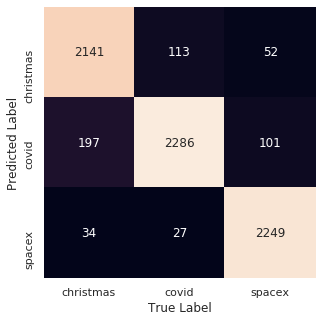

In [9]:
# confusion matrix for test set
distinct_label = sorted(set(test["Classification"])) # since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x, y label for heatmap
mat = confusion_matrix(test["Classification"], labels)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = distinct_label, yticklabels = distinct_label)
ax.set_ylim(len(distinct_label), 0) # since heatmap cut off numbers, we need to set up y limit 

plt.xlabel("True Label")
plt.ylabel("Predicted Label");

print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(test["Classification"], labels, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(test["Classification"], labels, average = "macro"), 6))

In [10]:
#Train set error
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(train["Classification"], train_labels, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(train["Classification"], train_labels, average = "macro"), 6))

Micro-average F1 scores: 0.963542
Macro-average F1 scores: 0.963652


## 3-1. MLPClassifier to build neural network model with 2 hidden layer

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [68]:
X_train, X_test, y_train, y_test = train['Text'], test['Text'], train['Classification'], test['Classification']

In [72]:
vectorizer = TfidfVectorizer()

Iteration 1, loss = 0.49295534
Validation score: 0.939583
Iteration 2, loss = 0.06766874
Validation score: 0.939236
Iteration 3, loss = 0.01439602
Validation score: 0.940625
Iteration 4, loss = 0.00463439
Validation score: 0.937153
Iteration 5, loss = 0.00214434
Validation score: 0.937153
Iteration 6, loss = 0.00150887
Validation score: 0.937153
Iteration 7, loss = 0.00134449
Validation score: 0.936458
Iteration 8, loss = 0.00094297
Validation score: 0.936458
Iteration 9, loss = 0.00086075
Validation score: 0.936458
Iteration 10, loss = 0.00076660
Validation score: 0.932292
Iteration 11, loss = 0.00071293
Validation score: 0.935764
Iteration 12, loss = 0.00070271
Validation score: 0.935069
Iteration 13, loss = 0.00064922
Validation score: 0.931944
Iteration 14, loss = 0.00064543
Validation score: 0.936111
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


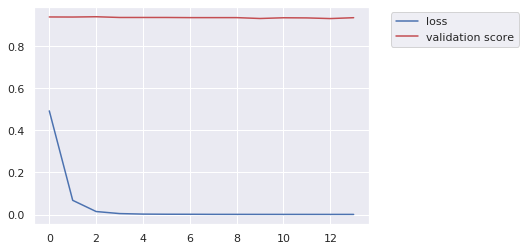

Train F1 score:
Micro-average F1 scores: 0.993681
Macro-average F1 scores: 0.993683


In [83]:
model3_1 = MLPClassifier(early_stopping=True,verbose = True,hidden_layer_sizes = (100, 100))
model3_1.fit(vectorizer.fit_transform(X_train), y_train)

label3_1 = model3_1.predict(vectorizer.transform(X_test))

test_acc3_1 = accuracy_score(y_test, label3_1)
loss_values3_1 = model3_1.loss_curve_
valid_values3_1 = model3_1.validation_scores_

plt.plot(loss_values3_1,'-b', label='loss')
plt.plot(valid_values3_1,'-r',label = 'validation score')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

label3_1_train = model3_1.predict(vectorizer.transform(X_train))
print("Train F1 score:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(y_train, label3_1_train, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(y_train, label3_1_train, average = "macro"), 6))

Micro-average F1 scores: 0.931389
Macro-average F1 scores: 0.931618


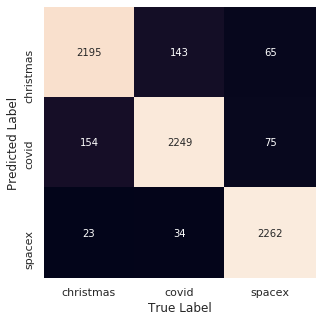

In [84]:
distinct_label = list(set(label3_1)) # since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x, y label for heatmap
mat = confusion_matrix(y_test, label3_1)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = sorted(set(test["Classification"])), yticklabels = distinct_label)
ax.set_ylim(len(distinct_label), 0) # since heatmap cut off numbers, we need to set up y limit 

plt.xlabel("True Label")
plt.ylabel("Predicted Label");

print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(y_test, label3_1, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(y_test, label3_1, average = "macro"), 6))

## 3-2. 3-1 + higher alpha

Iteration 1, loss = 0.80425744
Validation score: 0.925347
Iteration 2, loss = 0.46393191
Validation score: 0.933333
Iteration 3, loss = 0.41776105
Validation score: 0.943056
Iteration 4, loss = 0.39567635
Validation score: 0.935764
Iteration 5, loss = 0.38180691
Validation score: 0.937153
Iteration 6, loss = 0.37310598
Validation score: 0.935764
Iteration 7, loss = 0.36544994
Validation score: 0.934722
Iteration 8, loss = 0.36058084
Validation score: 0.938889
Iteration 9, loss = 0.35260411
Validation score: 0.934722
Iteration 10, loss = 0.34990803
Validation score: 0.932986
Iteration 11, loss = 0.34396700
Validation score: 0.932292
Iteration 12, loss = 0.34098849
Validation score: 0.935417
Iteration 13, loss = 0.33605068
Validation score: 0.935764
Iteration 14, loss = 0.33628841
Validation score: 0.936111
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Test accuracy score = 0.9295833333333333


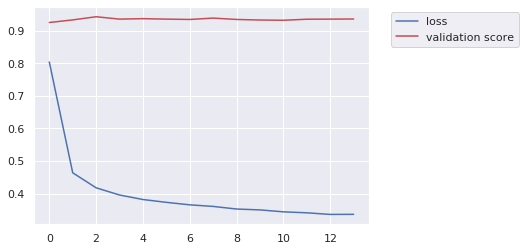

Train accuracy :0.9789583333333334


In [19]:
model3_2 = MLPClassifier(early_stopping=True,verbose = True,alpha = 0.5,hidden_layer_sizes = (100, 100))
model3_2.fit(vectorizer.fit_transform(X_train), y_train)

label3_2= model3_2.predict(vectorizer.transform(X_test))
label3_2_train = model3_2.predict(vectorizer.transform(X_train))
test_acc3_2 = accuracy_score(y_test, label3_2)
loss_values3_2 = model3_2.loss_curve_
valid_values3_2 = model3_2.validation_scores_

print("Test accuracy score = " + str(test_acc3_2))
plt.plot(loss_values3_2,'-b', label='loss')
plt.plot(valid_values3_2,'-r',label = 'validation score')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

train_lab3_2 = model3_2.predict(vectorizer.transform(X_train))
train_accuracy3_2 = accuracy_score(y_train, train_lab3_2)
print("Train accuracy :" + str(train_accuracy3_2))

Micro-average F1 scores: 0.929583
Macro-average F1 scores: 0.929908


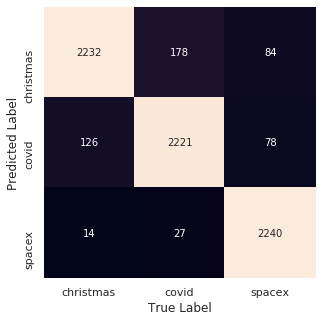

In [85]:
distinct_label = list(set(label3_2)) # since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x, y label for heatmap
mat = confusion_matrix(y_test, label3_2)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = sorted(set(test["Classification"])), yticklabels = distinct_label)
ax.set_ylim(len(distinct_label), 0) # since heatmap cut off numbers, we need to set up y limit 

plt.xlabel("True Label")
plt.ylabel("Predicted Label");

print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(y_test, label3_2, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(y_test, label3_2, average = "macro"), 6))

In [86]:
print("Train F1 score:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(y_train, label3_2_train, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(y_train, label3_2_train, average = "macro"), 6))

Train F1 score:
Micro-average F1 scores: 0.978958
Macro-average F1 scores: 0.978994


## 4. Tensor Flow model with Bidirectional LSTM

In [22]:
#pip install gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import FastText
import numpy as np
import re
import matplotlib.pyplot as plt

In [23]:
def doc_vocab(l) :
    lexicon = set()
    for i in l :
        for word in i.split() :
            if len(word) == 0 :
                continue
            lexicon.add(word)
    return lexicon

lexicon = doc_vocab(list(train["Text"]))
len(lexicon)

78985

In [24]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing as pp

print(tf.__version__)

2.2.0


In [25]:
vocab_size = 20000
embedding_dim = 100
max_length = 280

train_texts = list(train["Text"])
train_labels = list(train["Classification"])
test_text = list(test["Text"])
test_labels = list(test["Classification"])

tokenizer = Tokenizer(num_words = vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts)
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(train_texts)
#to make train one-hot-vector length all to 280
train_padded = pad_sequences(train_seq, maxlen=max_length, padding='post', truncating='post')
test_seq = tokenizer.texts_to_sequences(test_text)
test_padded = pad_sequences(test_seq, maxlen=max_length, padding='post', truncating='post')

labels = list(train_labels)
label_tokenizer = pp.LabelEncoder()
label_tokenizer.fit(labels)

train_label_seq = np.array(label_tokenizer.transform(train_labels))
test_label_seq = np.array(label_tokenizer.transform(test_labels))

lab = list(set(labels))
lab.sort()

## 4-1. Bidirectional LSTM with single 50 unit hidden layer with 0.5 drop out

In [41]:
model_biLSTM = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim), #vocab size 20K embedding size 100
    tf.keras.layers.Dropout(.5,input_shape=(100,)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'), #hidden layer 50 unit
    tf.keras.layers.Dense(3, activation='softmax')
])
model_biLSTM.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         2000000   
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_12 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 153       
Total params: 2,186,103
Trainable params: 2,186,103
Non-trainable params: 0
____________________________________________

In [42]:
model_biLSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 5
history1 = model_biLSTM.fit(train_padded, train_label_seq, batch_size=32,
                    validation_split=0.1,epochs=num_epochs, verbose=2)


pred1 = model_biLSTM.predict(test_padded)
pred_tain1 = model_biLSTM.predict(train_padded)

pred_label1 = []
for i in pred1 :
    pred_label1.append(lab[np.argmax(i)])
    
pred_label_train1 = []
for i in pred_tain1 :
    pred_label_train1.append(lab[np.argmax(i)])

Epoch 1/5
810/810 - 115s - loss: 0.3314 - accuracy: 0.8637 - val_loss: 0.1777 - val_accuracy: 0.9392
Epoch 2/5
810/810 - 113s - loss: 0.1255 - accuracy: 0.9580 - val_loss: 0.1842 - val_accuracy: 0.9361
Epoch 3/5
810/810 - 113s - loss: 0.0747 - accuracy: 0.9757 - val_loss: 0.2027 - val_accuracy: 0.9340
Epoch 4/5
810/810 - 111s - loss: 0.0499 - accuracy: 0.9837 - val_loss: 0.2344 - val_accuracy: 0.9358
Epoch 5/5
810/810 - 112s - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.2073 - val_accuracy: 0.9344


Test F1 scores:
Micro-average F1 scores: 0.925139
Macro-average F1 scores: 0.92528
Train F1 scores:
Micro-average F1 scores: 0.988924
Macro-average F1 scores: 0.988922


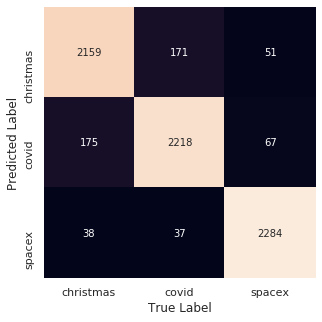

In [87]:
distinct_label = lab # since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x, y label for heatmap
mat = confusion_matrix(test["Classification"], pred_label1)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = sorted(set(test["Classification"])), yticklabels = distinct_label)
ax.set_ylim(len(distinct_label), 0) # since heatmap cut off numbers, we need to set up y limit 

plt.xlabel("True Label")
plt.ylabel("Predicted Label");

print("Test F1 scores:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(test_labels, pred_label1, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(test_labels, pred_label1, average = "macro"), 6))

#train f1 score
print("Train F1 scores:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(train_labels, pred_label_train1, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(train_labels, pred_label_train1, average = "macro"), 6))

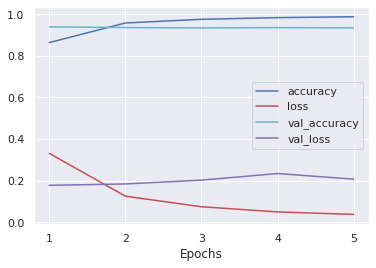

In [88]:
plt.plot(history1.history["accuracy"],'-b')
plt.plot(history1.history["loss"],'-r')
plt.plot(history1.history["val_accuracy"],'-c')
plt.plot(history1.history["val_loss"],'-m')
plt.xlabel("Epochs")
plt.legend(["accuracy", "loss","val_accuracy", "val_loss"])
plt.xticks(np.arange(len(history1.history["accuracy"])), np.arange(1, len(history1.history["accuracy"])+1))
plt.show()


## 4-2. Bidirectional LSTM with 2 hidden layer (50,35) with 0.5 drop out

In [45]:
model_biLSTM2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Dropout(.5,input_shape=(100,)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'), #1st hidden layer
    tf.keras.layers.Dense(35, activation='relu'), #2nd hidden layer
    tf.keras.layers.Dense(3, activation='softmax')
])
model_biLSTM2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         2000000   
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_17 (Dense)             (None, 35)                1785      
_________________________________________________________________
dense_18 (Dense)             (None, 3)                

In [46]:
model_biLSTM2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 3
history2 = model_biLSTM2.fit(train_padded, train_label_seq, batch_size=32,
                    validation_split=0.1,epochs=num_epochs, verbose=2)


pred2 = model_biLSTM2.predict(test_padded)
pred_tain2 = model_biLSTM2.predict(train_padded)

pred_label2 = []
for i in pred2 :
    pred_label2.append(lab[np.argmax(i)])
    
pred_label_train2 = []
for i in pred_tain2 :
    pred_label_train2.append(lab[np.argmax(i)])

Epoch 1/3
810/810 - 114s - loss: 0.3651 - accuracy: 0.8530 - val_loss: 0.1892 - val_accuracy: 0.9309
Epoch 2/3
810/810 - 110s - loss: 0.1321 - accuracy: 0.9553 - val_loss: 0.1841 - val_accuracy: 0.9417
Epoch 3/3
810/810 - 111s - loss: 0.0780 - accuracy: 0.9752 - val_loss: 0.1866 - val_accuracy: 0.9344



Test F1 scores:
Micro-average F1 scores: 0.929861
Macro-average F1 scores: 0.929905

Train F1 scores:
Micro-average F1 scores: 0.984618
Macro-average F1 scores: 0.98461


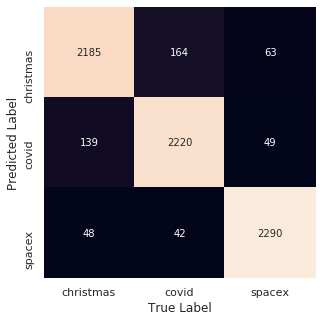

In [89]:
distinct_label = lab # since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x, y label for heatmap
mat = confusion_matrix(test["Classification"], pred_label2)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = sorted(set(test["Classification"])), yticklabels = distinct_label)
ax.set_ylim(len(distinct_label), 0) # since heatmap cut off numbers, we need to set up y limit 

plt.xlabel("True Label")
plt.ylabel("Predicted Label");

print("")
print("Test F1 scores:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(test_labels, pred_label2, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(test_labels, pred_label2, average = "macro"), 6))

print("")
print("Train F1 scores:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(train_labels, pred_label_train2, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(train_labels, pred_label_train2, average = "macro"), 6))

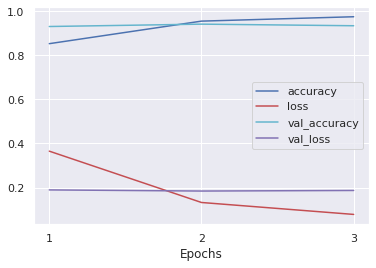

In [90]:
plt.plot(history2.history["accuracy"],'-b')
plt.plot(history2.history["loss"],'-r')
plt.plot(history2.history["val_accuracy"],'-c')
plt.plot(history2.history["val_loss"],'-m')
plt.xlabel("Epochs")
plt.legend(["accuracy", "loss","val_accuracy", "val_loss"])
plt.xticks(np.arange(len(history2.history["accuracy"])), np.arange(1, len(history2.history["accuracy"])+1))
plt.show()


## 4-3. Bidirectional LSTM with 3 hidden layer (50,35,70) with 0.5 drop out

In [49]:
model_biLSTM3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Dropout(.5,input_shape=(100,)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'), #1st hidden layer
    tf.keras.layers.Dense(35, activation='relu'), #2nd hidden layer
    tf.keras.layers.Dense(70, activation='relu'), #3rd hidden layer
    tf.keras.layers.Dense(3, activation='softmax')
])
model_biLSTM3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 100)         2000000   
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_20 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_21 (Dense)             (None, 35)                1785      
_________________________________________________________________
dense_22 (Dense)             (None, 70)               

In [50]:
model_biLSTM3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 3
history3 = model_biLSTM2.fit(train_padded, train_label_seq, batch_size=32,
                    validation_split=0.1,epochs=num_epochs, verbose=2)


pred3 = model_biLSTM2.predict(test_padded)
pred_tain3 = model_biLSTM2.predict(train_padded)

pred_label3 = []
for i in pred3 :
    pred_label3.append(lab[np.argmax(i)])
    
pred_label_train3= []
for i in pred_tain3 :
    pred_label_train3.append(lab[np.argmax(i)])


Epoch 1/3
810/810 - 112s - loss: 0.0551 - accuracy: 0.9828 - val_loss: 0.2380 - val_accuracy: 0.9351
Epoch 2/3
810/810 - 112s - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.2858 - val_accuracy: 0.9326
Epoch 3/3
810/810 - 111s - loss: 0.0318 - accuracy: 0.9892 - val_loss: 0.3010 - val_accuracy: 0.9306



Test F1 scores:
Micro-average F1 scores: 0.927222
Macro-average F1 scores: 0.927147

Train F1 scores:
Micro-average F1 scores: 0.989618
Macro-average F1 scores: 0.989612


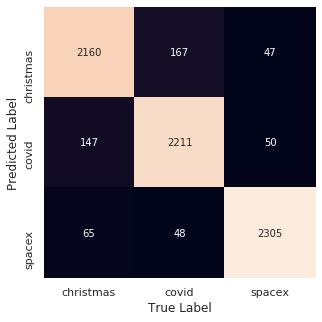

In [91]:
distinct_label = lab # since confusion matrix label is automatically sorted, sort the distinct label in train_labels to prepare x, y label for heatmap
mat = confusion_matrix(test["Classification"], pred_label3)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = sorted(set(test["Classification"])), yticklabels = distinct_label)
ax.set_ylim(len(distinct_label), 0) # since heatmap cut off numbers, we need to set up y limit 

plt.xlabel("True Label")
plt.ylabel("Predicted Label");

print("")
print("Test F1 scores:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(test_labels, pred_label3, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(test_labels, pred_label3, average = "macro"), 6))

print("")
print("Train F1 scores:")
print("Micro-average F1 scores: ", end = "")
print(np.round(f1_score(train_labels, pred_label_train3, average = "micro"), 6))
print("Macro-average F1 scores: ", end = "")
print(np.round(f1_score(train_labels, pred_label_train3, average = "macro"), 6))

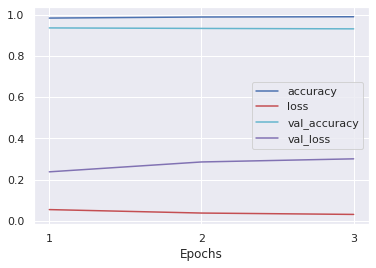

In [92]:
plt.plot(history3.history["accuracy"],'-b')
plt.plot(history3.history["loss"],'-r')
plt.plot(history3.history["val_accuracy"],'-c')
plt.plot(history3.history["val_loss"],'-m')
plt.xlabel("Epochs")
plt.legend(["accuracy", "loss","val_accuracy", "val_loss"])
plt.xticks(np.arange(len(history3.history["accuracy"])), np.arange(1, len(history3.history["accuracy"])+1))
plt.show()


## 5. Compute similarities between tweets using Fast Text word embedding

In [94]:
#pip install gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import FastText

In [95]:
model_ft = FastText(window = 3, min_count = 1, sentences = data['Text']) #100d word embedding
wv = model_ft.wv

In [96]:
from nltk.corpus import stopwords
import string
import numpy as np

def calc_doc_embedding(doc, embeddings, embed_size) :
    stopset = stopwords.words('english') + list(string.punctuation)
    words = [w for w in doc.lower().split() if w not in stopset] # exclude word in stopset
    word_cent = np.zeros(embed_size)
    
    count = 0
    for word in words :
        word_cent = word_cent + embeddings[word] 
        count = count + 1 # only count the word that is not stop words and not OOV

    if count == 0 :
        return None
    
    doc_embed = word_cent / count
    return doc_embed # return value is np array

In [97]:
# function for calculating the cosine similarity
def cal_similarity(a, b) :
    return np.round(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)), 6)

# function for removing emoji
def remove_emoji(string) :
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', string)

# function for cleaning text
def clean(Text) :
    Text = remove_emoji(Text) # remove emoji
    Text = re.sub("[-/]", " ", Text) # substitute dash and slash with space       
    text_split = Text.lower().split() # split string into list
    remove_list = []
    for t in text_split :
        if ("covid" or "christmas" or "spacex") in t : # remove all words containing our three hashtags
            remove_list.append(t)
        if 'http' in t : # remove link
            remove_list.append(t)
        if '@' in t : # remove ...@...
            remove_list.append(t)
        if t == '\n' : # remove new line character
            remove_list.append(t)
    text_split = [t for t in text_split if t not in remove_list]     
    
    for i in range(len(text_split)) :
        t = text_split[i]
        if t.startswith("'") or t.startswith('"') : # remove quotation mark
            text_split[i] = t[1:] 
        if t.endswith("'") or t.endswith('"') : 
            text_split[i] = t[:len(t) - 1]         
        text_split[i] = re.sub("[^a-z']", "", t)

    stopset = stopwords.words('english') + list(string.punctuation)
    text_split = [t for t in text_split if t not in stopset]  
            
    Text = ' '.join(text_split) # join the list back to string

    return Text

In [98]:
# function to find top 10 documents with the highest similarity for corpus[index]
def hashtag_suggestion() :
    hashtag1 = ""
    hashtag2 = []
    similarlity_dict = dict()
    doc1 = clean(input("Please enter tweet: "))
    if len(doc1) == 0 :
        return "Error! Impossible to suggest hashtags. Please enter tweet again."
    else :
        hashtag1 = model3_2.predict(vectorizer.transform([doc1]))[0] # get predicted hashtag by the best model
        data2 = data[data['Classification'] == hashtag1].reset_index() # get data from the same hashtag and then calculate similarity between these data and the text
        
        for i in range(len(data2)) :   
            doc2 = data2['Text'][i]         
            similarlity_dict[i] = cal_similarity(calc_doc_embedding(doc1, embeddings, embed_size), calc_doc_embedding(doc2, embeddings, embed_size))

        # find top 5 similarities
        n = 0
        for i in sorted(similarlity_dict.items(), reverse = True, key = lambda t: t[1]) :     
            for h in data2['Hashtag'][i[0]] :
                if h not in hashtag2 : 
                    hashtag2.append(h)
            n = n + 1
            if n == 5 :
                break 
    
        # print all suggested hashtags
        print("1. ", end = "")
        print(hashtag1)
        c = 2
        for i in hashtag2 :
            print(c, end = "")
            print(". ", end = "")
            print(i)
            c = c + 1
                              
        return

In [99]:
embeddings, embed_size = wv, 100

In [100]:
hashtag_suggestion() #Holidays are coming soon!!! 🥰🥰🥰

Please enter tweet:  Holidays are coming soon!!! 🥰🥰🥰


ValueError: dimension mismatch

In [ ]:
hashtag_suggestion() #Hope the weather is good. So excited to see the launch!!!

In [ ]:
hashtag_suggestion() #we have already lived with pandemic for 1 years!!